In [10]:
# %pip install -r ../../requirements.txt

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

from pic import PIC
from evaluation import evaluate_clustering_algorithms
from datasets import synthetic_dataset_1, synthetic_dataset_2, synthetic_dataset_3

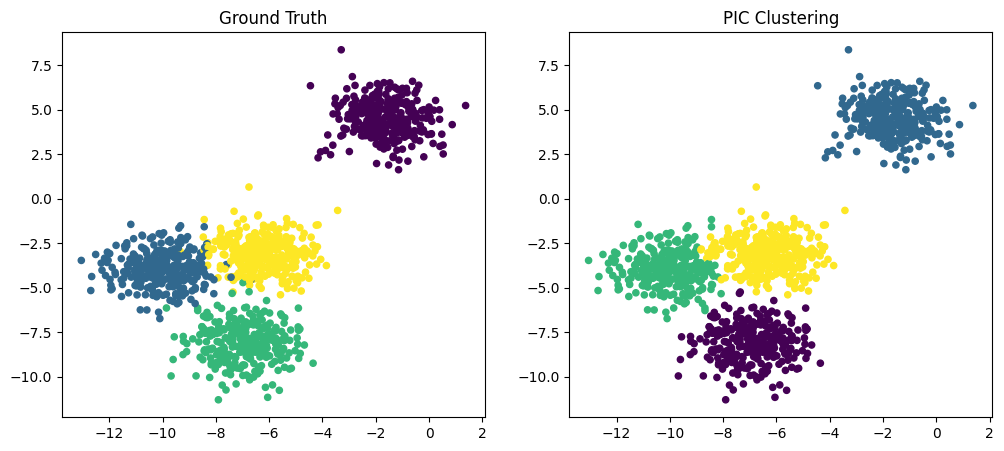

In [4]:
# Generate synthetic data.
n_samples = 1200
n_clusters = 4
X, Y_true = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=1)
pic = PIC(n_clusters=n_clusters, k=20, a=0.95, z=0.01)
Y_pred_PIC = pic.fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=Y_true, cmap='viridis', s=20)
plt.title("Ground Truth")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=Y_pred_PIC, cmap='viridis', s=20)
plt.title("PIC Clustering")

plt.show()

In [3]:
results_df = evaluate_clustering_algorithms(X, Y_true, n_clusters, Y_pred_PIC)
print(results_df)

k-med: NMI = 0.9410, CE = 0.0167
A-link: NMI = 0.8290, CE = 0.2558
S-link: NMI = 0.5745, CE = 0.5000
C-link: NMI = 0.8980, CE = 0.0358


c:\Users\sanch\Desktop\MAI\Semester2\URL\mai-url\.venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\sanch\Desktop\MAI\Semester2\URL\mai-url\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


AP: NMI = 0.5449, CE = 0.7683
NCuts: NMI = 0.9473, CE = 0.0142
NJW: NMI = 0.9497, CE = 0.0133
CT: NMI = 0.8821, CE = 0.0383
Zell: NMI = 0.9355, CE = 0.0192
C-kernel: NMI = 0.9343, CE = 0.0192
D-kernel: NMI = 0.9305, CE = 0.0208
   Algorithm       NMI        CE
0        PIC  0.936299  0.018333
1      k-med  0.941008  0.016667
2     A-link  0.829005  0.255833
3     S-link  0.574537  0.500000
4     C-link  0.897990  0.035833
5         AP  0.544909  0.768333
6      NCuts  0.947311  0.014167
7        NJW  0.949702  0.013333
8         CT  0.882135  0.038333
9       Zell  0.935453  0.019167
10  C-kernel  0.934329  0.019167
11  D-kernel  0.930476  0.020833


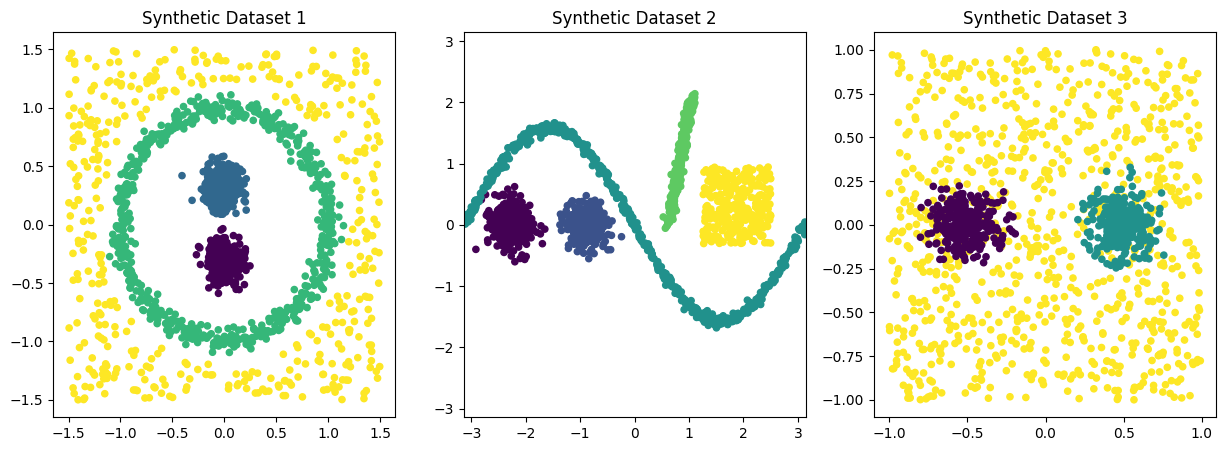

In [ ]:
X, Y = synthetic_dataset_1()

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", s=20)
plt.title("Synthetic Dataset 1")

X, Y = synthetic_dataset_2()

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", s=20)
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.title("Synthetic Dataset 2")

X, Y = synthetic_dataset_3()

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", s=20)
plt.title("Synthetic Dataset 3")

plt.show()

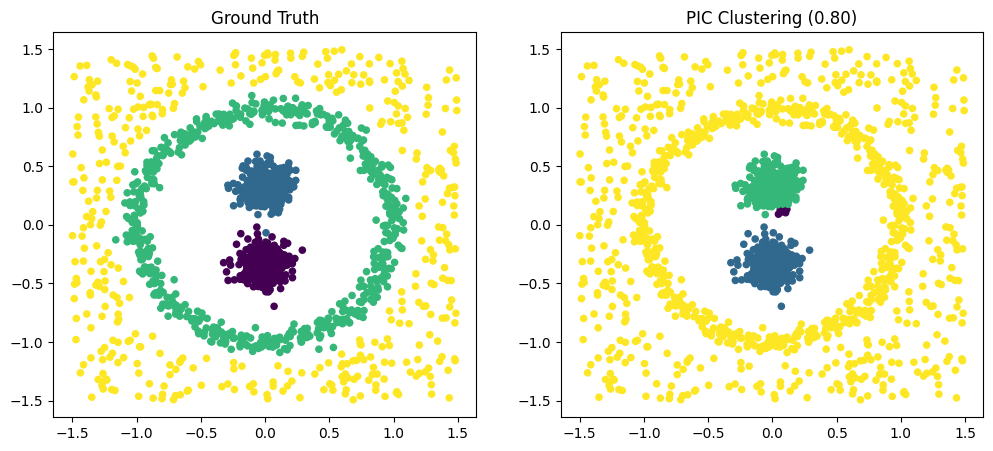

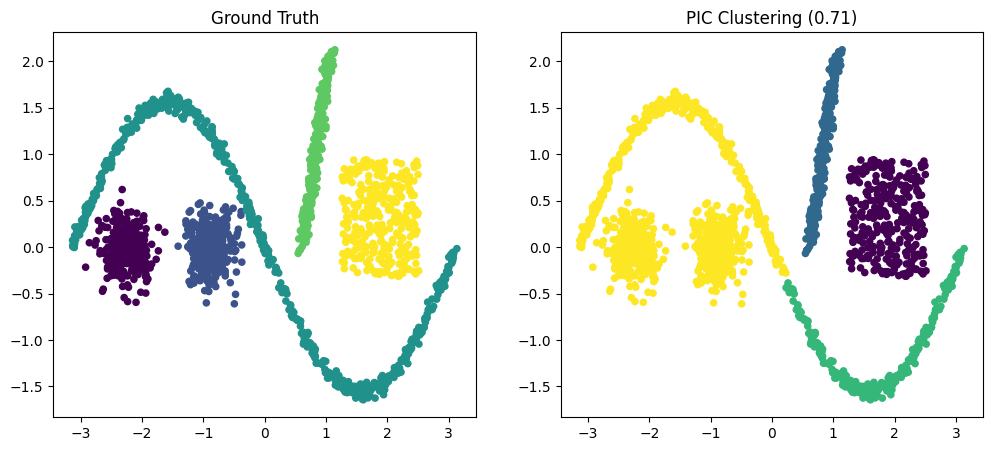

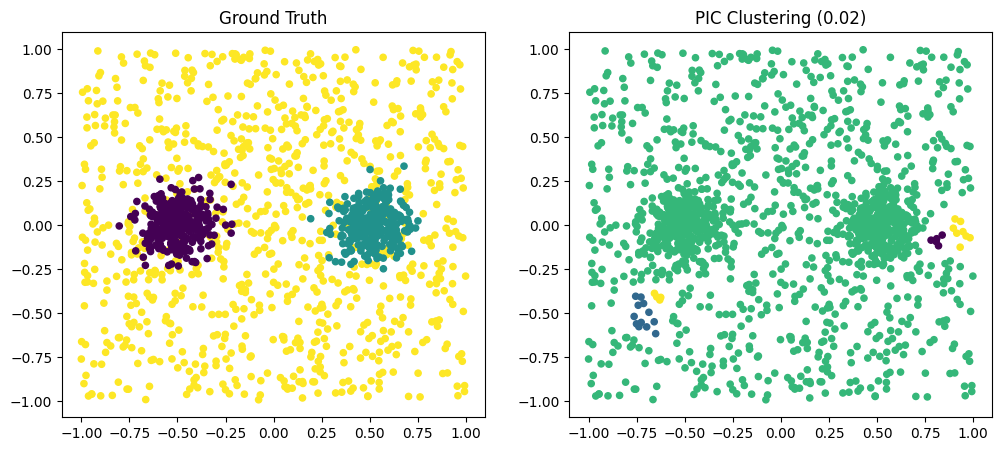

In [12]:
from sklearn.metrics import normalized_mutual_info_score

for dataset in [synthetic_dataset_1, synthetic_dataset_2, synthetic_dataset_3]:
    X, Y_true = dataset(cluster_density=0.75)
    pic = PIC(n_clusters=n_clusters, k=int(np.max(Y_true)+1), a=0.95, z=0.01)
    Y_pred_PIC = pic.fit_predict(X)
    nmi_score = normalized_mutual_info_score(Y_true, Y_pred_PIC)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=Y_true, cmap='viridis', s=20)
    plt.title("Ground Truth")

    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, 1], c=Y_pred_PIC, cmap='viridis', s=20)
    plt.title(f"PIC Clustering ({nmi_score:.2f})")

    plt.show()